In [12]:
#import dependencies

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import squarify
import matplotlib
import squarify

#read the csv in panda dataframe
attributes_df = pd.read_csv("../Resources/country_attributes.csv")
attributes_df.head(5)

    

,Unnamed: 0,country,danceability,energy,loudness,speechiness,acousticness,valence,tempo,duration
0,0,Argentina,0.744013,0.675101,-5.216302,0.131787,0.229910,0.646563,120.360768,206.661807
1,1,Australia,0.647711,0.633686,-6.481121,0.095834,0.254743,0.504944,120.494618,210.157895
2,2,Austria,0.690939,0.671089,-6.318950,0.111944,0.213600,0.532730,123.415775,187.416711
3,3,Belarus,0.685134,0.656724,-7.133241,0.125515,0.213192,0.455123,124.346252,171.488864
4,4,Belgium,0.696079,0.677366,-6.198538,0.108677,0.218400,0.549937,122.500907,197.808202


In [42]:
#Create a histogram of subplots
fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness', '<i>acousticness', '<i>valence', '<i>tempo','duration'))
fig.add_trace(go.Histogram(x=attributes_df['danceability'],name='danceability'),row=1,col=1)
fig.add_trace(go.Histogram(x=attributes_df['energy'],name='energy'),row=1,col=2)
fig.add_trace(go.Histogram(x=attributes_df['loudness'],name='loudness'),row=1,col=3)
fig.add_trace(go.Histogram(x=attributes_df['speechiness'],name='speechiness'),row=2,col=1)
fig.add_trace(go.Histogram(x=attributes_df['acousticness'],name='acousticness'),row=2,col=2)
fig.add_trace(go.Histogram(x=attributes_df['valence'],name='valence'),row=2,col=3)
fig.add_trace(go.Histogram(x=attributes_df['tempo'],name='tempo'),row=3,col=1)
fig.add_trace(go.Histogram(x=attributes_df['duration'],name='duration'),row=3,col=2)
fig.update_layout(height=450,width=650,title_text='<b>Attribute Distribution')
fig.update_layout(template= 'plotly_white', title_x=0.5)

#savefig("Images/attribute1_img")

In [43]:
attributes_df.describe()

,Unnamed: 0,danceability,energy,loudness,speechiness,acousticness,valence,tempo,duration
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,36.000000,0.679345,0.639808,-6.404888,0.104976,0.274398,0.532510,122.015991,203.179044
std,21.217131,0.037786,0.041782,0.765876,0.023273,0.059959,0.059084,2.735977,12.849209
min,0.000000,0.575209,0.514803,-8.301330,0.054349,0.152151,0.415057,115.868290,171.488864
25%,18.000000,0.657622,0.616622,-6.898861,0.094626,0.237901,0.488954,120.329361,195.455975
50%,36.000000,0.682145,0.648146,-6.503108,0.104252,0.267570,0.524196,122.239130,203.195298
75%,54.000000,0.708540,0.667318,-5.665059,0.118298,0.305073,0.581261,123.665528,209.642611
max,72.000000,0.744020,0.730124,-4.811269,0.171695,0.474302,0.658520,131.047969,239.617368


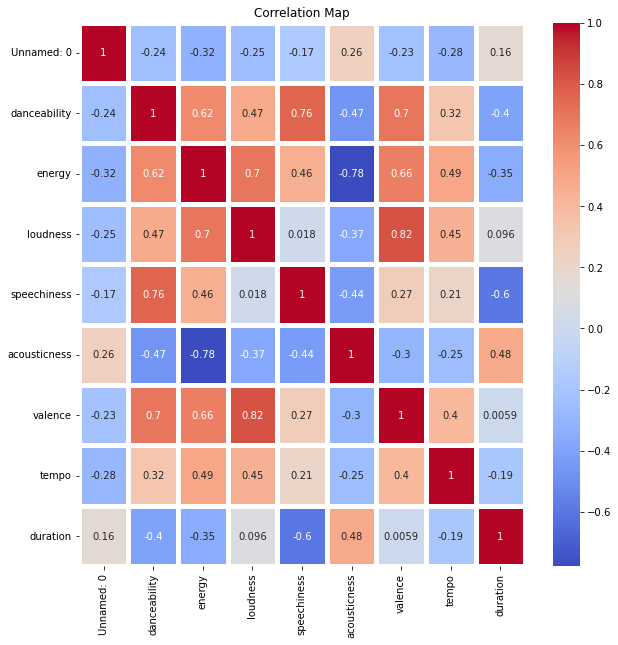

In [13]:
plt.figure(figsize=(10,10))
plt.title('Correlation Map')
ax=sns.heatmap(attributes_df.corr(),
               linewidth=3.1,
               annot=True,
               cmap="coolwarm")
# plt.savefig("Images/heatmap.png")

In [44]:
#read the csv in panda dataframe
cool_df = pd.read_csv("../Resources/coolness.csv")
cool_df.head(5)

,Unnamed: 0,artist_names,track_name,weeks_on_chart,rank,streams,WOC_ratio,rank_pts,streams_ratio,Popularity_Score
0,0,Tulus,Hati-Hati di Jalan,19.0,9.0,4026918.0,0.066,0.955,1.000,0.673667
1,1,Henrique & Juliano,A Maior Saudade - Ao Vivo,45.0,19.0,3549891.0,0.155,0.905,0.882,0.647333
2,2,João Gomes,Dengo,10.0,20.0,4025622.0,0.034,0.900,1.000,0.644667
3,3,Keisya Levronka,Tak Ingin Usai,8.0,3.0,3624225.0,0.028,0.985,0.900,0.637667
4,4,Jorge & Mateus,Todo Seu - Ao Vivo,10.0,18.0,3496942.0,0.034,0.910,0.868,0.604000


In [51]:
cool_df1 = cool_df.rename(columns={"Popularity_Score":"Popularity Score", "track_name":"Track name"})
cool_df1.head(2)

,Unnamed: 0,artist_names,Track name,weeks_on_chart,rank,streams,WOC_ratio,rank_pts,streams_ratio,Popularity Score
0,0,Tulus,Hati-Hati di Jalan,19.0,9.0,4026918.0,0.066,0.955,1.000,0.673667
1,1,Henrique & Juliano,A Maior Saudade - Ao Vivo,45.0,19.0,3549891.0,0.155,0.905,0.882,0.647333


In [54]:
cool_fig= px.line(cool_df1.sort_values(by='Popularity Score',ascending=False).head(10),x='Track name',y='Popularity Score',hover_data=['artist_names'],color_discrete_sequence=['purple'],markers=True,)
cool_fig.update_layout(template='plotly_white',title_x=0.5)
cool_fig.update_layout(height=400,width=600)
cool_fig.show()

In [14]:
artists_df = cool_df['artist_names'].value_counts().rename_axis('artist_names').reset_index(name='counts')
top_10_artists = artists_df.head(10)
top_10_artists

,artist_names,counts
0,BTS,96
1,Taylor Swift,74
2,Bad Bunny,49
3,Abyusif,35
4,Måneskin,34
5,Marília Mendonça,33
6,Kanye West,32
7,NCT DREAM,31
8,LFERDA,30
9,Marwan Moussa,30


In [15]:
top_10_artists.rename(columns = {'artist_names':'Artist Names'}, inplace = True)
top_10_artists

/var/folders/b5/j39h_1x96k1chxfr7985xwh00000gn/T/ipykernel_79750/968464659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_artists.rename(columns = {'artist_names':'Artist Names'}, inplace = True)


,Artist Names,counts
0,BTS,96
1,Taylor Swift,74
2,Bad Bunny,49
3,Abyusif,35
4,Måneskin,34
5,Marília Mendonça,33
6,Kanye West,32
7,NCT DREAM,31
8,LFERDA,30
9,Marwan Moussa,30


Text(0, 0.5, 'Count on Charts')

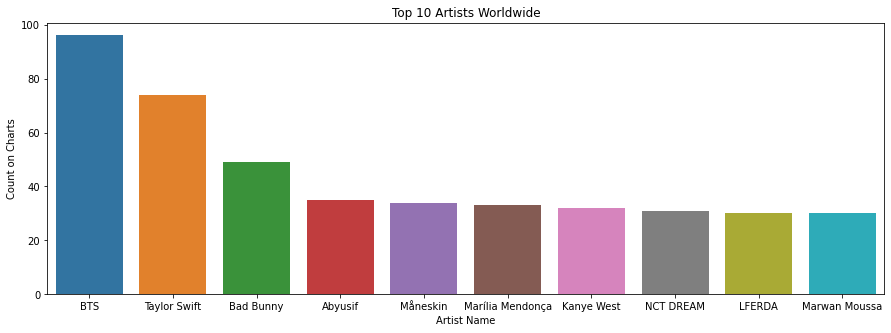

In [16]:
plt.figure(figsize=(15,5))
sns.set_color_codes("muted")
sns.barplot(x="Artist Names", y="counts", data = top_10_artists)
plt.title('Top 10 Artists Worldwide')
plt.xlabel('Artist Name')
plt.ylabel('Count on Charts')
# plt.savefig("Images/artist_popularity.png")

In [17]:
genre_data = "../Resources/top_fifty_genres.csv"
genres = pd.read_csv(genre_data)
genres.head()

,Unnamed: 0,artist_genre,artist_names
0,0,pop,107610
1,1,trap latino,40392
2,2,latin,34474
3,3,reggaeton,33662
4,4,dance pop,31377


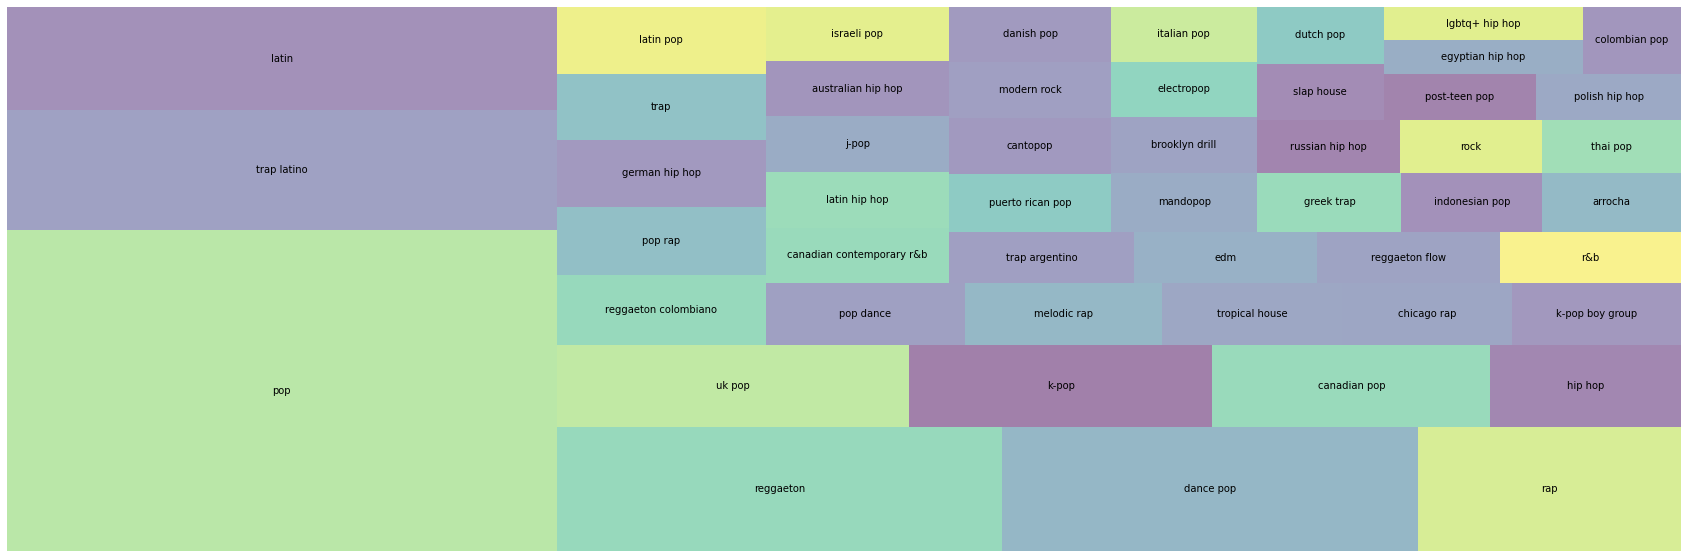

In [18]:
plt.figure(figsize=(30,10))
squarify.plot(sizes=genres['artist_names'],label=genres['artist_genre'], alpha=.5 )
plt.axis('off')
# plt.savefig("treemaps.png")
plt.show()